<a target="_blank" href="https://colab.research.google.com/github/sonder-art/ia_p25/blob/main/curso/temas/01_razonamiento/preferencias_sencillas.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 1. Imports & Setup

In [1]:
# ================================================
# Celda 1: Importaciones y Configuración
# ================================================

import matplotlib.pyplot as plt
import numpy as np

# Explicación:
# Importamos las bibliotecas para graficar y manipular datos.
# Solo necesitamos estas dos para representar las preferencias.


# 2: Funciones Auxiliares (Validador de la Base de Conocimientos)

In [2]:
# ================================================
# Celda 2: Funciones Auxiliares (Validador, etc.)
# ================================================

def validate_preferences(preferences, possible_places):
    """
    validate_preferences(preferences, possible_places):
        - preferences: Diccionario que representa las preferencias de cada persona.
        - possible_places: Lista de lugares posibles para ir a comer.

    Esta función se asegura de:
        1. Que haya al menos dos personas (2 <= n).
        2. Que cada persona proporcione una preferencia para cada lugar de possible_places.
        3. Que las preferencias coincidan con la lista de lugares conocidos.

    Retorna:
        - True, si todas las preferencias son válidas.
        - False, si hay algún error; imprime mensajes de error específicos.
    
    GOFAI / Explicación Simbólica:
        - Preparamos nuestra "Base de Conocimientos" con hechos:
          "Cada persona tiene 5 (o n) preferencias que corresponden a la lista de lugares."
        - Este método verifica la consistencia de esos hechos.
    """
    if len(preferences) < 2:
        print("ERROR: Se necesitan al menos 2 personas para tomar la decisión.")
        return False

    required_number_of_places = len(possible_places)
    for person_name, pref_list in preferences.items():
        if len(pref_list) != required_number_of_places:
            print(f"ERROR: La persona '{person_name}' no proporcionó exactamente "
                  f"{required_number_of_places} preferencias.")
            return False
        
        for place in pref_list:
            if place not in possible_places:
                print(f"ERROR: La persona '{person_name}' incluyó un lugar desconocido '{place}'.")
                return False

    print("¡Todas las preferencias han sido validadas correctamente!")
    return True

def visualize_preferences(preferences, possible_places):
    """
    visualize_preferences(preferences, possible_places):
        - preferences: Diccionario de preferencias (persona -> lista de lugares).
        - possible_places: Lista de lugares posibles.

    Crea una gráfica de barras para ilustrar cuántas veces se elige cada lugar
    como primera opción (#1 preference).

    GOFAI / Explicación Simbólica:
        - Aunque el enfoque GOFAI es principalmente simbólico,
          podemos incluir visualizaciones para entender mejor la
          información que hay en la base de conocimientos.
    """
    # Contar cuántas veces aparece cada lugar como primera preferencia
    top_choice_count = {place: 0 for place in possible_places}
    for person_name, pref_list in preferences.items():
        top_preference = pref_list[0]
        top_choice_count[top_preference] += 1
    
    # Preparar datos para la gráfica
    places = list(top_choice_count.keys())
    counts = [top_choice_count[p] for p in places]

    fig, ax = plt.subplots()
    ax.bar(places, counts, color='skyblue', edgecolor='black')
    ax.set_xlabel("Lugares")
    ax.set_ylabel("Conteo de Preferencias #1")
    ax.set_title("Preferencias Principales de Cada Persona")

    for i, v in enumerate(counts):
        ax.text(i, v + 0.1, str(v), ha='center', fontweight='bold')

    plt.ylim(0, max(counts) + 1)
    plt.show()


#  3: Inference Engine (Esqueleto de Reglas IF-THEN)

In [3]:
# ================================================
# Celda 3: Inference Engine (Esqueleto IF-THEN)
# ================================================

def inference_engine(preferences, possible_places):
    """
    inference_engine(preferences, possible_places):
        - preferences: Diccionario validado de las preferencias de cada persona.
        - possible_places: Lista de lugares conocidos.

    Descripción de Entradas (Inputs):
      - 'preferences' es un diccionario como:
          {
            "Persona_1": [lugarA, lugarB, ...],
            "Persona_2": [lugarC, lugarB, ...],
            ...
          }
      - 'possible_places' es una lista con todos los lugares disponibles, ej:
          ["tacos", "ramen", "pizza", "tortas", "hamburguesas"]
    
    Descripción de Salida (Output):
      - Regresa un string con el lugar seleccionado (ej. "tacos").

    Explicación GOFAI:
        - Este método representa la "lógica simbólica" del sistema.
        - Las reglas IF-THEN se pueden describir así:
          EJEMPLO:
            IF la mayoría prefiere X en primer lugar THEN vamos a X
            ELSE si hay un empate, usar la preferencia #2, etc.
    
    ¡IMPORTANTE!
    - Los estudiantes deben modificar la lógica interna de esta función
      para que refleje su estrategia de decisión.
    - Pueden usar reglas más complejas, ponderaciones,
      o cualquier enfoque basado en condiciones IF-THEN.

    Retorna:
      - El nombre del lugar escogido.
    """

    # ========= EJEMPLO MUY SENCILLO DE LÓGICA POR VOTACIÓN DE PRIMERA PREFERENCIA =========
    # 1) Contamos la cantidad de veces que cada lugar aparece como primera preferencia
    place_votes = {place: 0 for place in possible_places}
    for person, pref_list in preferences.items():
        top_pref = pref_list[0]     # primera preferencia
        place_votes[top_pref] += 1  # sumamos voto

    # 2) Buscamos el lugar con mayor número de votos
    winner, max_votes = None, -1
    for place, votes in place_votes.items():
        if votes > max_votes:
            winner = place
            max_votes = votes

    # 3) Si hubiera un empate, aquí podemos agregar más reglas:
    #    - Ejemplo: usar la segunda preferencia para desempatar
    #    - O bien, asignar distintos pesos por persona, etc.

    return winner


## Explicacion del metodo para agregar



Esta celda explica la lógica actual del **`inference_engine`** (Celda 3) de manera más detallada.

1. **Recorremos todas las personas** y extraemos su **primera preferencia** (`pref_list[0]`).
2. **Llevamos un conteo** (`place_votes`) de cuántas veces aparece cada lugar como **#1**.
3. **Determinamos** cuál es el lugar que tiene el **mayor conteo** de primeras preferencias.
4. **Retornamos** ese lugar como **`winner`**.

> **Nota:** Este método es intencionalmente simple para ilustrar la idea de un sistema simbólico basado en **IF-THEN**. En la práctica (o como ejercicio), se pueden añadir:
> - **Reglas de desempate** (ej. segundas preferencias).
> - **Reglas de prioridad** (ej. una persona tiene doble voto).
> - **Reglas de veto** ("si alguien odia el lugar, descártalo").
> - **Otros criterios** (ej. presupuesto, cercanía, salud, etc.).

La intención es que el estudiante **copie y pegue** la definición de la función **`inference_engine`** (Celda 3) en un chatbot (ej. ChatGPT) junto con su **explicación en lenguaje natural** de cómo debe funcionar su lógica de decisión, y reciba una versión **mejorada/ajustada** de la función.


## Objetivo del ejercicio


**Objetivo del Ejercicio**:  
Decidir a dónde ir a comer basándose en las preferencias de un grupo de personas.

1. **Revisa la celda** `inference_engine` **(Celda 3)** y **modifica las reglas IF-THEN**  
   para que se ajusten a tu **estrategia de decisión**. Puede ser tan **simple o compleja**  
   como quieras.

2. **Una vez que tengas tu propia lógica**, **copia y pega** la función  
   `inference_engine` *(junto con tu explicación en lenguaje natural)* en un **chatbot**  
   (por ejemplo, **ChatGPT**). **Pídele al chatbot** que **revise/optimice** y **tenga en cuenta**  
   tus **condiciones para la toma de decisión**.

3. **Vuelve a pegar la respuesta del chatbot** en la misma función (u otra) y **experimenta**  
   hasta que logres la **lógica deseada**.

4. **Agrega reglas de desempate y prioridades.**  
   **Ejemplo**:
   - "Si dos lugares empatan en **primeras preferencias**, contar cuántas veces aparecen  
     en **segunda preferencia**."
   - "Cada persona puede tener un **'peso' distinto**. Ej. la persona que cumple años  
     tiene **doble voto**."



## Sugerencias de Prompt Engineering



A continuación, algunos **consejos y ejemplos** que puedes **copiar y pegar** (o adaptar) al trabajar con un **chatbot** (p. ej., **ChatGPT**) para **mejorar tu `inference_engine`**:

### 1. Proporciona contexto:

> "Tengo una función llamada `inference_engine` que decide **dónde ir a comer** basándose en las preferencias de un grupo de personas. Cada persona tiene un **orden de preferencia** para varios lugares. **Quiero agregar reglas de desempate y ponderación**. ¿Podrías ayudarme a **mejorar la lógica IF-THEN**?"

### 2. Explica tu lógica en lenguaje natural antes de pedir que el chatbot la codifique:

> "Quiero que si hay un **empate en la primera preferencia**, se **revise la segunda preferencia**. Si hay un nuevo empate, **revisar la tercera**, etc. Además, la persona llamada **'Carlos'** tiene **doble voto** si su lugar favorito coincide con el desempate."

### 3. Pide correcciones y sugerencias:

> "Por favor, **verifica** si mi solución podría tener **conflictos lógicos** o si hay **casos límite** (por ejemplo, qué pasa cuando dos lugares quedan igualados en las **cuatro primeras preferencias**)."

### 4. Indica el formato de salida esperado:

> "Me gustaría que **devuelvas una versión actualizada de mi función `inference_engine` en formato Python**, sin modificar el resto de mi código."

### 5. Pide ejemplos de prueba:

> "Sugiere algunos **casos de prueba interesantes** para validar la **robustez de mis reglas** (ej. un caso con **4 personas**, un caso con **3 lugares**, etc.)."

### 6. Repite y refina:

Si la respuesta del chatbot **no satisface tus necesidades**, **refina la pregunta**:

> "Tu solución está muy bien, pero **quiero que la ponderación sea configurable para cada persona**. ¿Podrías **mostrarme cómo hacerlo**?"


# 5 : Datos de Entrada (Hechos)

¡Todas las preferencias han sido validadas correctamente!


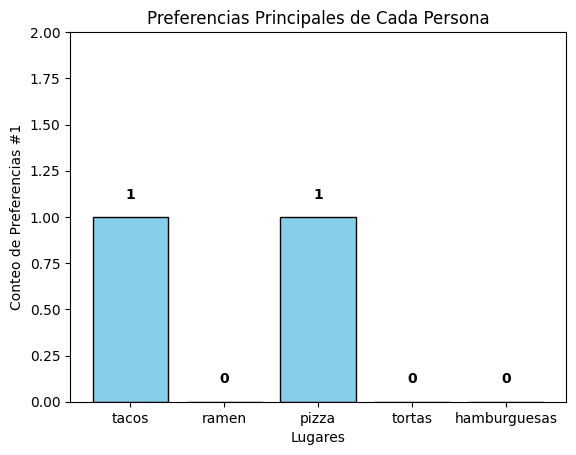


¡El sistema de inferencia decidió que iremos a comer a 'tacos'!


In [6]:

# Definimos los posibles lugares (nuestra "Base de Conocimientos")
possible_places = ["tacos", "ramen", "pizza", "tortas", "hamburguesas"]

# Diccionario de preferencias (personas -> lista de lugares en orden de preferencia).
# Cada persona debe listar sus preferencias en el mismo orden y con la misma longitud 
# que la lista de 'possible_places'.
preferences = {
    "Alice": ["pizza", "ramen", "tacos", "hamburguesas", "tortas"],
    "Bob":   ["tacos", "pizza", "ramen", "tortas", "hamburguesas"],
    # Agrega más personas si lo deseas
}


# 1) Validar las preferencias
valid = validate_preferences(preferences, possible_places)

if valid:
    # 2) Visualizar las preferencias
    visualize_preferences(preferences, possible_places)
    
    # 3) Ejecutar el Inference Engine para decidir dónde comer
    chosen_place = inference_engine(preferences, possible_places)
    
    # 4) Mostrar el resultado final
    print(f"\n¡El sistema de inferencia decidió que iremos a comer a '{chosen_place}'!")
else:
    print("Por favor, corrige los errores en las preferencias y vuelve a ejecutar la celda.")
